# MNIST Neural Network classifier


## REF

* [모두를 위한 머신러닝/딥러닝 강의](https://hunkim.github.io/ml/)
  - [lab-10-4-mnist_nn_deep.py](https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-10-4-mnist_nn_deep.py)
  - [lab-10-5-mnist_nn_dropout.py](https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-10-5-mnist_nn_dropout.py)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets( "MNIST_data/", one_hot=True )

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# parameters
tf.set_random_seed(777)
nb_classes = 10
image_shape = 28 * 28 
nn_layer_size = 512

learning_rate = 0.001
num_epochs = 101
batch_size = 100
num_iterations = int( mnist.train.num_examples / batch_size )
print( "MNIST training example size: ", mnist.train.num_examples )

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

MNIST training example size:  55000


In [5]:
X = tf.placeholder( tf.float32, [None, image_shape ])
Y = tf.placeholder( tf.float32, [None, nb_classes ] )

# weights & bias for nn layers
W1 = tf.get_variable("W_1", shape=[ image_shape, nn_layer_size ], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable( tf.random_normal( [ nn_layer_size ] ) )
L1 = tf.nn.relu( tf.matmul(X, W1) + b1 )
L1 = tf.nn.dropout( L1, keep_prob=keep_prob )

W2 = tf.get_variable("W_2", shape=[ nn_layer_size, nn_layer_size ], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable( tf.random_normal( [ nn_layer_size ] ) )
L2 = tf.nn.relu( tf.matmul(L1, W2) + b2 )
L2 = tf.nn.dropout( L2, keep_prob=keep_prob )

W3 = tf.get_variable("W_3", shape=[ nn_layer_size, nn_layer_size ], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable( tf.random_normal( [ nn_layer_size ] ) )
L3 = tf.nn.relu( tf.matmul(L2, W3) + b3 )
L3 = tf.nn.dropout( L3, keep_prob=keep_prob )

W4 = tf.get_variable("W_4", shape=[ nn_layer_size, nn_layer_size ], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable( tf.random_normal( [ nn_layer_size ] ) )
L4 = tf.nn.relu( tf.matmul(L3, W4) + b4 )
L4 = tf.nn.dropout( L3, keep_prob=keep_prob )

W5 = tf.get_variable("W_5", shape=[ nn_layer_size, nb_classes ], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable( tf.random_normal( [ nb_classes ] ) )
H = tf.matmul(L4, W5) + b5


In [6]:
# Hypothesis (using softmax)
cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits=H, labels=Y ) )
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [8]:
sess = tf.Session() 

# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())

# Training cycle
for epoch in range(num_epochs):
    avg_cost = 0

    for i in range(num_iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        _, cost_val = sess.run( [ optimizer, cost ], feed_dict=feed_dict )
        avg_cost += cost_val / num_iterations

    if epoch % 10 == 0:
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

print("Learning finished")

Epoch: 0001, Cost: 0.446349617
Epoch: 0011, Cost: 0.052740080
Epoch: 0021, Cost: 0.033689203
Epoch: 0031, Cost: 0.028034579
Epoch: 0041, Cost: 0.024578928
Epoch: 0051, Cost: 0.021766443
Epoch: 0061, Cost: 0.018829662
Epoch: 0071, Cost: 0.019878834
Epoch: 0081, Cost: 0.021220202
Epoch: 0091, Cost: 0.020092990
Epoch: 0101, Cost: 0.018759096
Learning finished


In [10]:
correct_prediction = tf.equal(tf.argmax( H, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean( tf.cast( correct_prediction, tf.float32 ) )

print(
    "Accuracy: ",
    accuracy.eval(
        session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}
    ),
)

Accuracy:  0.9827


Label:  [1]
Prediction:  [1]


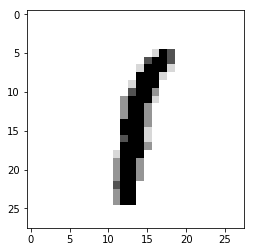

In [12]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
print(
    "Prediction: ",
    sess.run(tf.argmax( H, 1), feed_dict={X: mnist.test.images[r : r + 1], keep_prob: 1}),
)

plt.imshow(
    mnist.test.images[r : r + 1].reshape(28, 28),
    cmap="Greys",
    interpolation="nearest",
)
plt.show()

sess.close()